In [11]:
import pm4py
import pandas as pd
import conformance.main as cc
import discovery.main as discovery
import enhancement.main as enhancement
import requests
from utils.api_requests import fetch_event_log,fetch_bot_model
import json
from utils.bot.parse_lib import get_parser

In [12]:
def getBotInfo(endpoint="http://localhost:8080/SBFManager"):
    """
    Fetches the first bot from the social bot manager and returns its id and name
    """
    response = requests.get(f"{endpoint}/bots")
    if response.status_code == 200:
        data = json.loads(response.content)
        if len(data) == 0:
            return None
        first_value = list(data.values())[0]
        return first_value['id'], first_value['name']
    else:
        return None

In [13]:
bot_manager_endpoint = "https://mobsos.tech4comp.dbis.rwth-aachen.de/SBFManager"
# bot_manager_endpoint = "http://localhost:8080/SBFManager"
bot_id, bot_name = getBotInfo()

In [14]:

# event_log_generator_endpoint = "https://mobsos.tech4comp.dbis.rwth-aachen.de/event-log"
event_log_generator_endpoint = "http://localhost:8087"

log = fetch_event_log(bot_name, event_log_generator_endpoint)
if log is None:
    raise ValueError("Event log not found")

log.head()

Fetching event log from http://localhost:8087/bot/MensaBot


parsing log, completed traces :: 100%|██████████| 7/7 [00:00<00:00, 4464.06it/s]
/Users/lakhoune/Desktop/Repos/process-mining-for-bots/.venv/lib/python3.10/site-packages/pm4py/utils.py:494: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


,EVENT_TYPE,REMARKS,RESOURCE,RESOURCE_TYPE,concept:name,in-service-context,intent,lifecycle:transition,serviceEndpoint,stateLabel,time:timestamp,user,case:concept:name
0,USER_MESSAGE,"{""user"": ""155afb0b06460d7c3bb33b23f91f71e1cc86...",142bf3bd43da452fa595d3a26c311b6f860595e1c735e7...,bot,greeting,False,greeting,complete,,greeting,2023-10-30 09:06:20+00:00,155afb0b06460d7c3bb33b23f91f71e1cc865bbe043051...,787c84ec-7baa-414b-bf4c-3e288e39ec39
1,USER_MESSAGE,"{""user"": ""155afb0b06460d7c3bb33b23f91f71e1cc86...",142bf3bd43da452fa595d3a26c311b6f860595e1c735e7...,bot,requestMenu,False,menu,complete,,requestMenu,2023-10-30 09:06:25+00:00,155afb0b06460d7c3bb33b23f91f71e1cc865bbe043051...,ada18435-fb22-4ce7-8264-7cff1f0c0454
2,SERVICE_REQUEST,"{""user"": ""155afb0b06460d7c3bb33b23f91f71e1cc86...",142bf3bd43da452fa595d3a26c311b6f860595e1c735e7...,bot,getMenu,False,NaN,complete,https://mobsos.tech4comp.dbis.rwth-aachen.de/m...,NaN,2023-10-30 09:06:31+00:00,155afb0b06460d7c3bb33b23f91f71e1cc865bbe043051...,ada18435-fb22-4ce7-8264-7cff1f0c0454
3,USER_MESSAGE,"{""user"": ""155afb0b06460d7c3bb33b23f91f71e1cc86...",142bf3bd43da452fa595d3a26c311b6f860595e1c735e7...,bot,listCanteens,False,listMensas,complete,,listCanteens,2023-10-30 09:06:45+00:00,155afb0b06460d7c3bb33b23f91f71e1cc865bbe043051...,c659b225-b7f7-4a98-8b6e-de8f49d2dba6
4,SERVICE_REQUEST,"{""user"": ""155afb0b06460d7c3bb33b23f91f71e1cc86...",142bf3bd43da452fa595d3a26c311b6f860595e1c735e7...,bot,getMenu,False,NaN,complete,https://mobsos.tech4comp.dbis.rwth-aachen.de/m...,NaN,2023-10-30 09:06:51+00:00,155afb0b06460d7c3bb33b23f91f71e1cc865bbe043051...,c659b225-b7f7-4a98-8b6e-de8f49d2dba6


# Discovered Model

Fetching bot model from https://mobsos.tech4comp.dbis.rwth-aachen.de/SBFManager/models/MensaBot


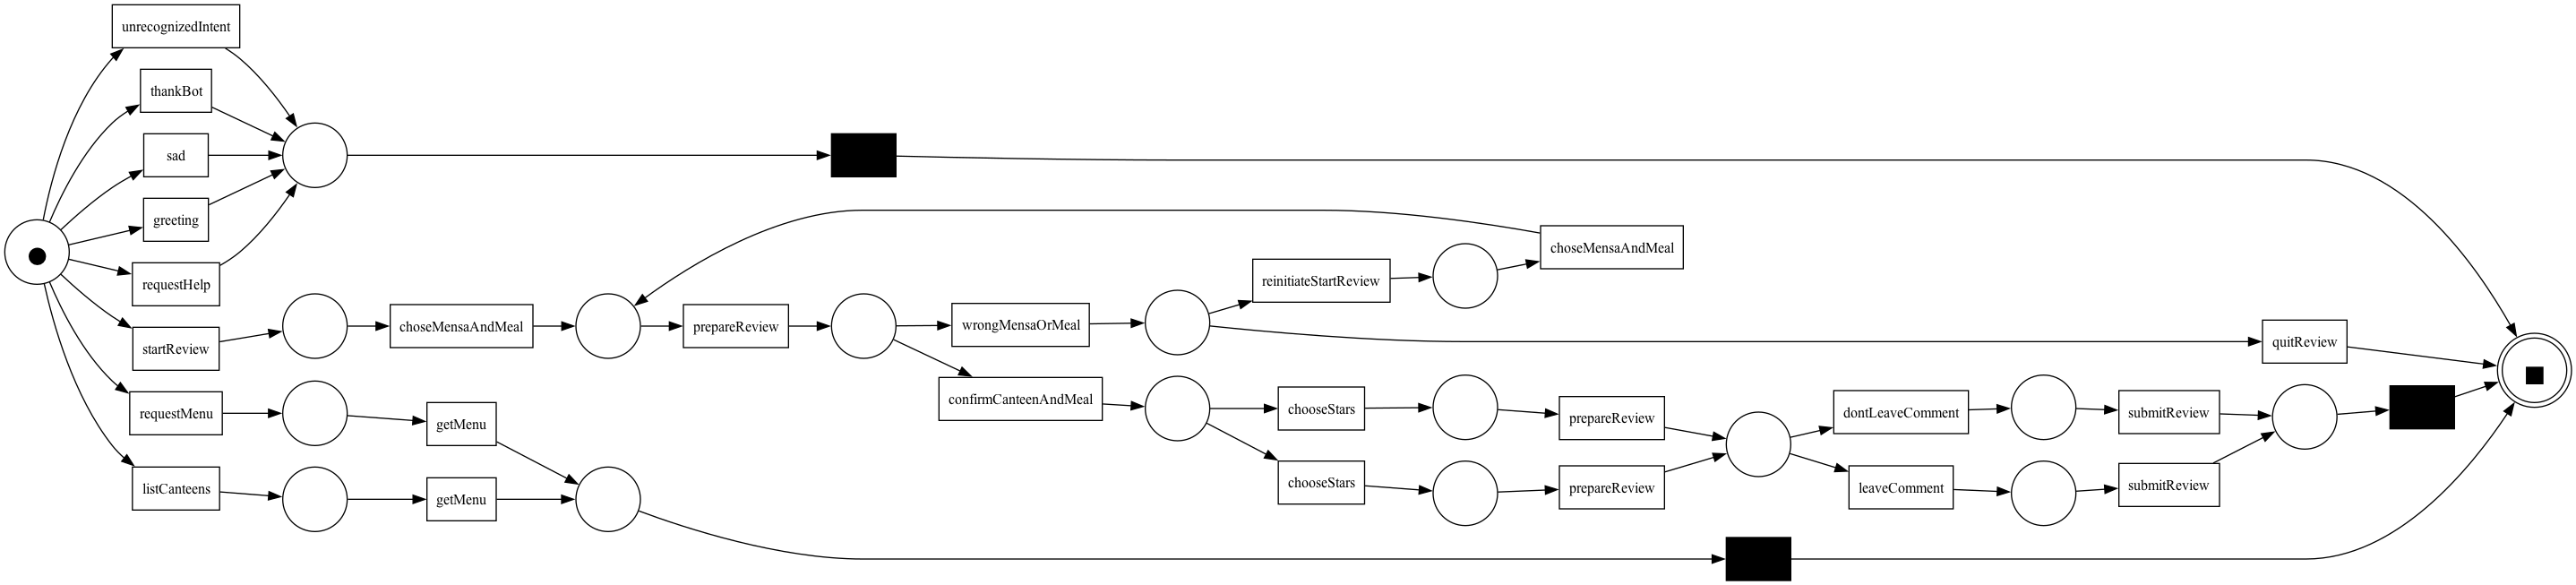

In [18]:
model = fetch_bot_model(bot_name,bot_manager_endpoint)
bp = get_parser(model)
dfg,start_activities,end_activities = bp.get_dfg()
bot_net,bot_im,bot_fm= bp.to_petri_net()
pm4py.view_petri_net(bot_net,bot_im,bot_fm)

aligning log, completed variants :: 100%|██████████| 6/6 [00:00<00:00, 677.43it/s]


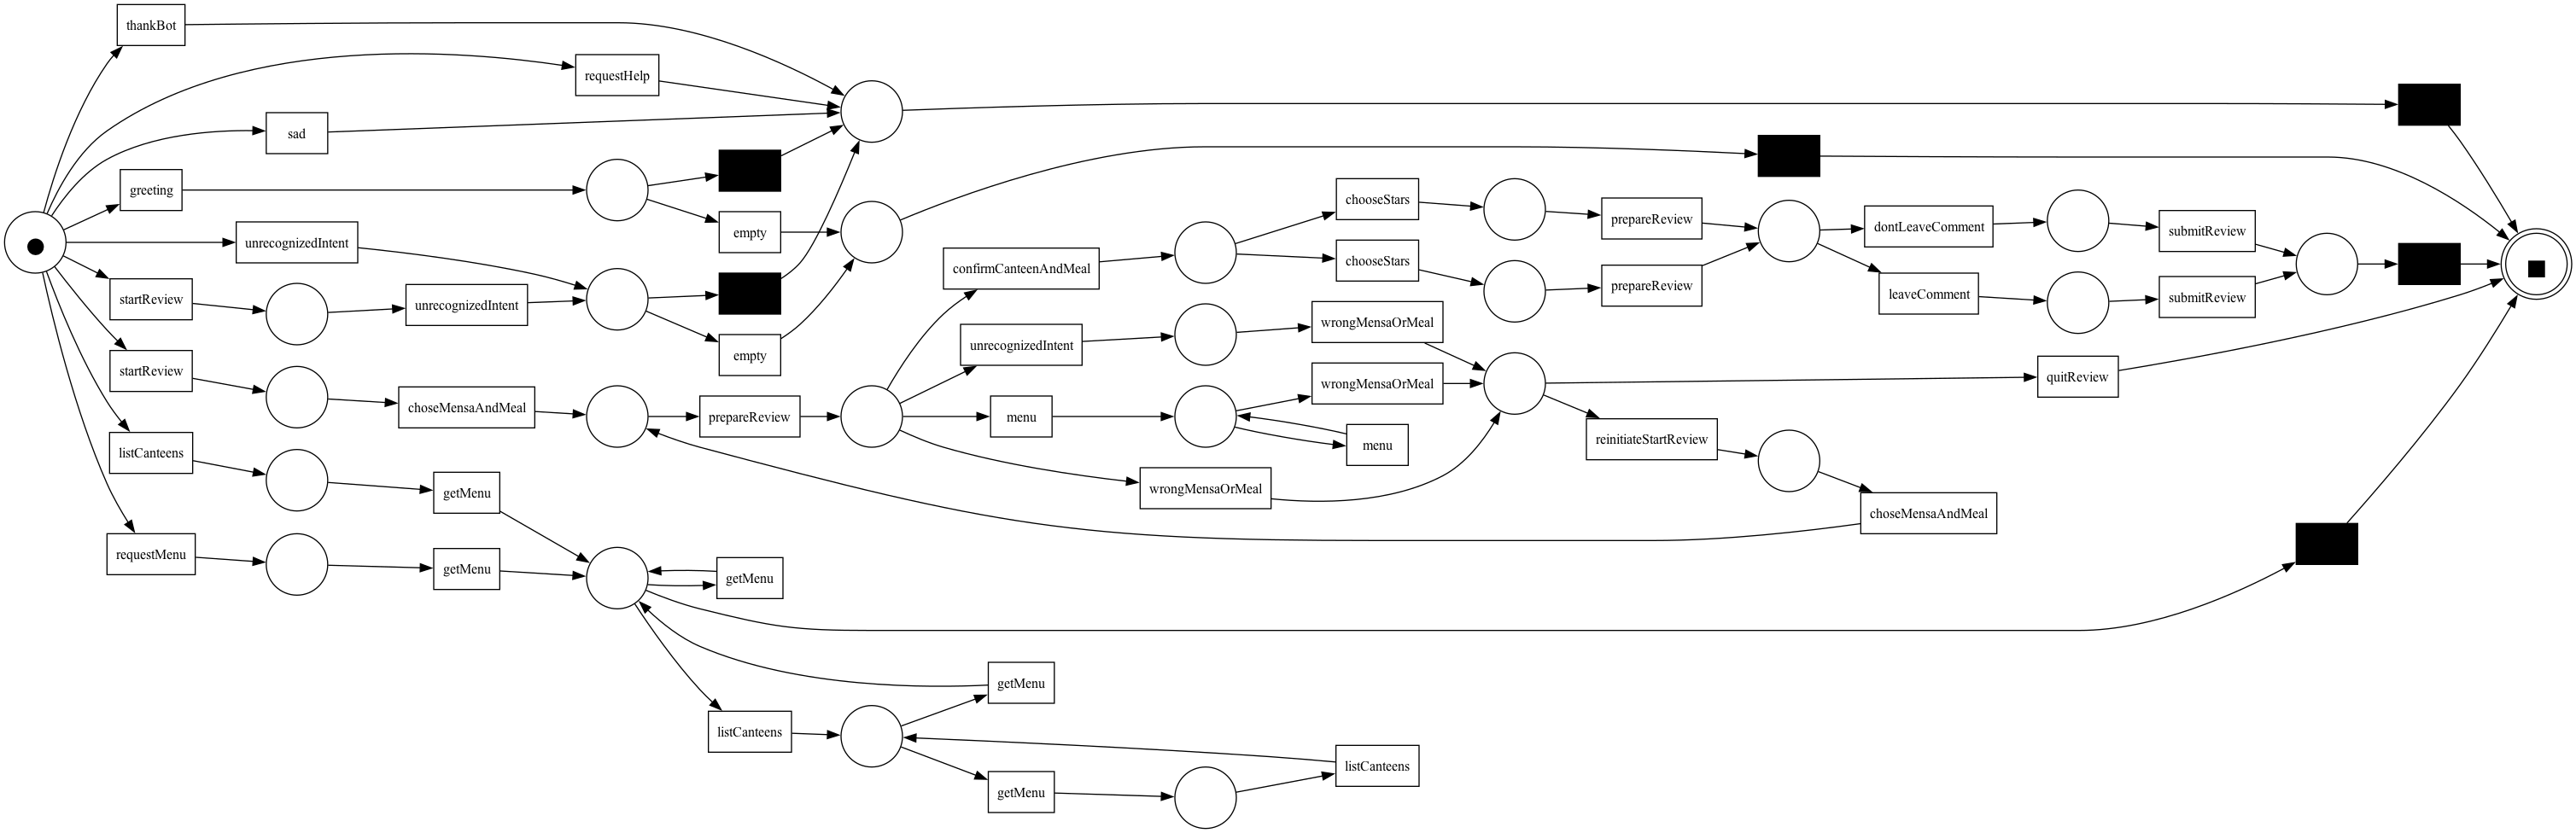

In [19]:
enhanced_model,start_activities,end_activities,_ = enhancement.enhance_bot_model(log, bp)
bot_net,bot_im,bot_fm=bp.to_petri_net(enhanced_model,start_activities,end_activities)
pm4py.view_petri_net(bot_net,bot_im,bot_fm)